### Programming for Statistics HW#3

#### a) Load data

In [60]:
#필요할 라이브러리 불러오기

import pandas as pd
import numpy as np

In [61]:
data_x = pd.read_csv('X.csv') #csv파일 불러오기
data_y = pd.read_csv('y.csv')

In [62]:
data_x

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
0,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
1,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
2,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
3,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
4,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,1
259,1,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,0
260,1,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,0
261,1,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,0


In [63]:
data_y

,x
0,475.0
1,480.0
2,500.0
3,91.5
4,750.0
...,...
258,700.0
259,875.0
260,385.0
261,960.0


In [64]:
#matrix 계산을 위해 numpy행렬로 변환
X = data_x.to_numpy()
y = data_y.to_numpy()

In [65]:
X

array([[  1, 315,  81, ...,  43,  10,   1],
       [  1, 479, 130, ...,  82,  14,   0],
       [  1, 496, 141, ...,  11,   3,   1],
       ...,
       [  1, 475, 126, ..., 113,   7,   0],
       [  1, 573, 144, ..., 131,  12,   0],
       [  1, 631, 170, ...,   4,   3,   0]], dtype=int64)

In [66]:
X.shape # n=263 p=19 

(263, 20)

In [67]:
y[:5] # 앞의 5개정도만 확인

array([[475. ],
       [480. ],
       [500. ],
       [ 91.5],
       [750. ]])

In [68]:
y.shape

(263, 1)

#### b) Find W_hat: so that w=w_hat minimize MSE(w)

In [70]:
from numpy.linalg import inv 

#mse를 최소화하는 w_hat값 구하는 함수 정의 
def estimate_w(X, y):
    w_hat = (inv((X.T).dot(X))).dot(X.T).dot(y) #normal equation을 사용한다
    #(X'*X)*X'*y 이용
    return w_hat

In [71]:
w_hat = estimate_w(X, y)
w_hat

array([[ 1.63103588e+02],
       [-1.97987290e+00],
       [ 7.50076754e+00],
       [ 4.33088290e+00],
       [-2.37620998e+00],
       [-1.04496196e+00],
       [ 6.23128632e+00],
       [-3.48905426e+00],
       [-1.71340473e-01],
       [ 1.33990961e-01],
       [-1.72861070e-01],
       [ 1.45430494e+00],
       [ 8.07708802e-01],
       [-8.11570911e-01],
       [ 6.25994230e+01],
       [-1.16849246e+02],
       [ 2.81892513e-01],
       [ 3.71069210e-01],
       [-3.36076048e+00],
       [-2.47623251e+01]])

In [72]:
w_hat = estimate_w(X, y)
w_hat

array([[ 1.63103588e+02],
       [-1.97987290e+00],
       [ 7.50076754e+00],
       [ 4.33088290e+00],
       [-2.37620998e+00],
       [-1.04496196e+00],
       [ 6.23128632e+00],
       [-3.48905426e+00],
       [-1.71340473e-01],
       [ 1.33990961e-01],
       [-1.72861070e-01],
       [ 1.45430494e+00],
       [ 8.07708802e-01],
       [-8.11570911e-01],
       [ 6.25994230e+01],
       [-1.16849246e+02],
       [ 2.81892513e-01],
       [ 3.71069210e-01],
       [-3.36076048e+00],
       [-2.47623251e+01]])

In [73]:
w_hat.shape

(20, 1)

#### c) Using w=w_hat in part b), calculate MSE(w_hat)

In [74]:
#MSE 구하는 함수 정의
def MSE(X, y, w_hat):
    y_pred = X.dot(w_hat) #앞서 구한 w_hat값을 이용하여 y 예측값을 구함
    mse = np.sum((y - y_pred)**2) / (X.shape[0]) #MSE식을 이용하여 MSE 구한다
    rmse = np.sqrt(mse)
    
    return mse, rmse

In [75]:
mse, rmse = MSE(X, y, estimate_w(X, y)) #약 92017
print('mse: '+str(mse))
print('rmse: ' +str(rmse))

mse: 92017.86901772917
rmse: 303.34447253531613


#### d) Draw the scatter plot of (yi,yi_hat) and draw the y=x line.

In [76]:
y_pred = X.dot(w_hat) #y_hat

In [77]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'yi')

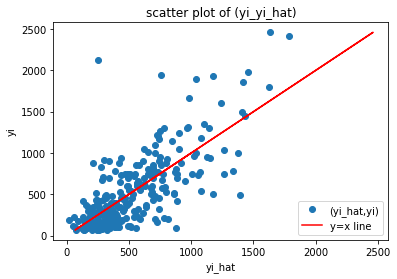

In [78]:
plt.plot(y_pred,y, 'o')
plt.plot(y, y, 'r-')
plt.title("scatter plot of (yi_yi_hat)")
plt.legend(["(yi_hat,yi)", "y=x line"])
plt.xlabel("yi_hat")
plt.ylabel("yi")

#### e) Calculate the mean and variance of X[:,d] for each d. Note that the mean and variance of X[:,0] is 1 and 0, respectively

In [79]:
X.shape

(263, 20)

In [80]:
np.mean(X, axis=0) #평균

array([1.00000000e+00, 4.03642586e+02, 1.07828897e+02, 1.16197719e+01,
       5.47452471e+01, 5.14866920e+01, 4.11140684e+01, 7.31178707e+00,
       2.65754373e+03, 7.22186312e+02, 6.92395437e+01, 3.61220532e+02,
       3.30418251e+02, 2.60266160e+02, 4.71482890e-01, 5.09505703e-01,
       2.90711027e+02, 1.18760456e+02, 8.59315589e+00, 4.63878327e-01])

In [81]:
np.var(X, axis=0) #분산

array([0.00000000e+00, 2.16169065e+04, 2.02855247e+03, 7.63953505e+01,
       6.49802021e+02, 6.67367694e+02, 4.69880525e+02, 2.28913820e+01,
       5.20858141e+06, 4.18565201e+05, 6.73075250e+03, 1.09275411e+05,
       1.04169057e+05, 6.94603854e+04, 2.49186774e-01, 2.49909642e-01,
       7.80654070e+04, 2.09683419e+04, 4.34808657e+01, 2.48695225e-01])

In [82]:
np.std(X, axis=0) #표준편차

array([0.00000000e+00, 1.47026890e+02, 4.50394546e+01, 8.74044338e+00,
       2.54912146e+01, 2.58334607e+01, 2.16767277e+01, 4.78449391e+00,
       2.28223167e+03, 6.46966151e+02, 8.20411635e+01, 3.30568316e+02,
       3.22752315e+02, 2.63553383e+02, 4.99186112e-01, 4.99909633e-01,
       2.79401874e+02, 1.44804495e+02, 6.59400225e+00, 4.98693518e-01])

In [83]:
#각 d값에 대한 평균과 분산을 하나씩 구해 출력하였다.
for i in range(X.shape[1]):
    print('mean and variance of X[:,'+str(i)+']')
    mean = np.mean(X[:,i])
    variance = np.var(X[:,i])
    print('mean: '+str(mean))
    print('variance: '+str(variance))
    print('\n')

mean and variance of X[:,0]
mean: 1.0
variance: 0.0


mean and variance of X[:,1]
mean: 403.6425855513308
variance: 21616.906475444204


mean and variance of X[:,2]
mean: 107.82889733840304
variance: 2028.552472928624


mean and variance of X[:,3]
mean: 11.61977186311787
variance: 76.39535051829577


mean and variance of X[:,4]
mean: 54.745247148288975
variance: 649.8020211366363


mean and variance of X[:,5]
mean: 51.48669201520912
variance: 667.3676936199741


mean and variance of X[:,6]
mean: 41.11406844106464
variance: 469.88052451242606


mean and variance of X[:,7]
mean: 7.311787072243346
variance: 22.891381977475458


mean and variance of X[:,8]
mean: 2657.5437262357414
variance: 5208581.411586116


mean and variance of X[:,9]
mean: 722.1863117870722
variance: 418565.201029363


mean and variance of X[:,10]
mean: 69.23954372623574
variance: 6730.752504734781


mean and variance of X[:,11]
mean: 361.2205323193916
variance: 109275.41144154173


mean and variance of X[:,12]
mean: 3

#### f) Based on the result in e), make the [n,p+1] matrix X* which is standardized version of X so that the mean and variance of X*[:,d] for each d is 0 and 1, respectively

In [84]:
X_d = X[:,1:] #X[:,0]을 제외한 matrix에 대해 표준화를 하기위해 정의

In [85]:
X_d

array([[315,  81,   7, ...,  43,  10,   1],
       [479, 130,  18, ...,  82,  14,   0],
       [496, 141,  20, ...,  11,   3,   1],
       ...,
       [475, 126,   3, ..., 113,   7,   0],
       [573, 144,   9, ..., 131,  12,   0],
       [631, 170,   9, ...,   4,   3,   0]], dtype=int64)

In [86]:
from numpy import *

X_std = (X_d - mean(X_d, axis=0)) / std(X_d, axis=0) #표준화 진행

In [87]:
X_std #표준화한 결과

array([[-0.6029005 , -0.59567545, -0.5285512 , ..., -0.52319133,
         0.21335208,  1.07505242],
       [ 0.51254171,  0.49225957,  0.72996619, ..., -0.25386267,
         0.81996395, -0.9301872 ],
       [ 0.62816682,  0.73648988,  0.95878753, ..., -0.74417894,
        -0.84821868,  1.07505242],
       ...,
       [ 0.48533581,  0.40344855, -0.98619389, ..., -0.03978092,
        -0.24160682, -0.9301872 ],
       [ 1.15188054,  0.80309815, -0.29972986, ...,  0.08452461,
         0.51665801, -0.9301872 ],
       [ 1.54636621,  1.38036979, -0.29972986, ..., -0.79251998,
        -0.84821868, -0.9301872 ]])

In [88]:
#표준화한 X값을 각 d값에 대한 평균과 분산을 하나씩 구해 출력해보니
#모두 평균이 1, 표준편차가 0이 되었음을 확인할 수 있다. 
for i in range(X_std.shape[1]):
    print('mean and variance of X_std[:,'+str(i+1)+']')
    mean = np.mean((X_std[:,i]))
    variance = np.var((X_std[:,i]))
    print('mean: '+str(mean))
    print('variance: '+str(variance))
    print('\n')

mean and variance of X_std[:,1]
mean: 1.0131312772244775e-17
variance: 1.0


mean and variance of X_std[:,2]
mean: 5.741077237605372e-17
variance: 1.0000000000000002


mean and variance of X_std[:,3]
mean: 3.377104257414925e-17
variance: 1.0


mean and variance of X_std[:,4]
mean: -5.0656563861223874e-17
variance: 1.0


mean and variance of X_std[:,5]
mean: 1.215757532669373e-16
variance: 1.0000000000000002


mean and variance of X_std[:,6]
mean: 1.6885521287074624e-18
variance: 1.0


mean and variance of X_std[:,7]
mean: -5.40336681186388e-17
variance: 1.0


mean and variance of X_std[:,8]
mean: 6.078787663346865e-17
variance: 1.0


mean and variance of X_std[:,9]
mean: 6.75420851482985e-17
variance: 1.0


mean and variance of X_std[:,10]
mean: 5.40336681186388e-17
variance: 1.0


mean and variance of X_std[:,11]
mean: 3.377104257414925e-17
variance: 1.0


mean and variance of X_std[:,12]
mean: 4.05252510889791e-17
variance: 1.0


mean and variance of X_std[:,13]
mean: 1.0806733623727

In [89]:
np.mean(X_std, axis=0) #표준화 결과 평균이 모두 0이 되었음을 확인할 수 있다.

array([ 1.01313128e-17,  5.74107724e-17,  3.37710426e-17, -5.06565639e-17,
        1.21575753e-16,  1.68855213e-18, -5.40336681e-17,  6.07878766e-17,
        6.75420851e-17,  5.40336681e-17,  3.37710426e-17,  4.05252511e-17,
        1.08067336e-16, -1.35084170e-17, -1.08067336e-16,  7.42962937e-17,
        0.00000000e+00,  1.04690232e-16,  1.35084170e-17])

In [90]:
np.var(X_std, axis=0) #표준화 결과 분산이 모두 1이 되었음을 확인할 수 있다.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [91]:
np.std(X_std, axis=0) #표준편차 확인

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [92]:
X_std.shape

(263, 19)

In [93]:
 # 표준화를 진행하지 않았던 X[:,0]을 다시 합쳐 X star을 완성한다
X_star = np.concatenate((X[:,:1], X_std),axis=1)
X_star

array([[ 1.        , -0.6029005 , -0.59567545, ..., -0.52319133,
         0.21335208,  1.07505242],
       [ 1.        ,  0.51254171,  0.49225957, ..., -0.25386267,
         0.81996395, -0.9301872 ],
       [ 1.        ,  0.62816682,  0.73648988, ..., -0.74417894,
        -0.84821868,  1.07505242],
       ...,
       [ 1.        ,  0.48533581,  0.40344855, ..., -0.03978092,
        -0.24160682, -0.9301872 ],
       [ 1.        ,  1.15188054,  0.80309815, ...,  0.08452461,
         0.51665801, -0.9301872 ],
       [ 1.        ,  1.54636621,  1.38036979, ..., -0.79251998,
        -0.84821868, -0.9301872 ]])

In [94]:
X_star.shape #[n,p+1] matrix의 Xstar이 만들어졌다

(263, 20)

#### g) Repeat b) and c) using X* and y.

In [95]:
#위의 b,c과정을 그대로 진행한다. 위에서 정의한 함수를 그대로 사용하였다

In [96]:
# Find W_hat: so that w=w_hat minimize MSE(w)
w_hat = estimate_w(X_star, y)
w_hat

array([[ 535.92588213],
       [-291.0945557 ],
       [ 337.83047948],
       [  37.85383676],
       [ -60.57247861],
       [ -26.99498379],
       [ 135.07389695],
       [ -16.69335888],
       [-391.03865466],
       [  86.68761664],
       [ -14.18172332],
       [ 480.74713477],
       [ 260.68988581],
       [-213.89225864],
       [  31.2487626 ],
       [ -58.41406355],
       [  78.76129639],
       [  53.73248973],
       [ -22.16086217],
       [ -12.34881102]])

In [97]:
w_hat.shape

(20, 1)

In [98]:
#Using w=w_hat, calculate MSE(w_hat)
mse, rmse = MSE(X_star, y, estimate_w(X_star, y))
print('mse: '+str(mse))
print('rmse: ' +str(rmse))
#표준화를 진행하였음에도 MSE값은 동일하다

mse: 92017.86901772917
rmse: 303.34447253531613
